In [1]:
import pandas as pd
import numpy as np
import bilby
import pickle

import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [3]:
my_color = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [5]:
lbs = ['year', 'H0', 'H0_plus_err']

data_planck = pd.read_csv('data/data_planck.txt', names = lbs, skiprows = 1, delimiter = ' ')
data_sne = pd.read_csv('data/data_late.txt', names = lbs, skiprows = 1, delimiter = ' ')

data_planck['err'] = data_planck['H0_plus_err'] - data_planck['H0']
data_sne['err'] = data_sne['H0_plus_err'] - data_sne['H0']

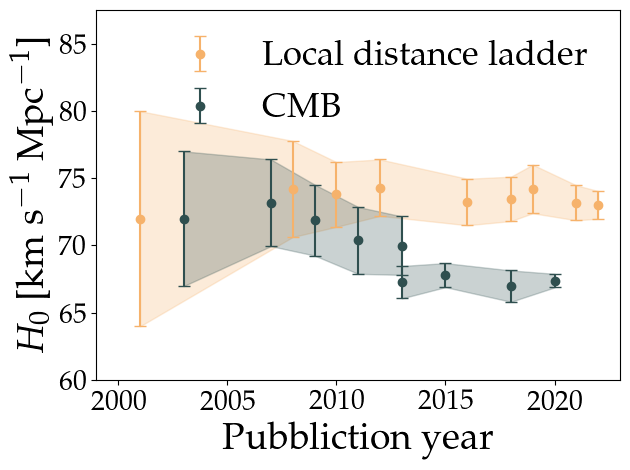

In [28]:
plt.errorbar(x = data_sne['year'], y = data_sne['H0'],
							color = my_color2_darker, yerr = data_sne['err'], fmt = 'o', label = 'Local distance ladder', capsize=4)
plt.fill_between(data_sne['year'], data_sne['H0'] - data_sne['err'], data_sne['H0'] + data_sne['err'], 
				color = my_color2_darker, alpha = 0.25)
plt.errorbar(x = data_planck['year'], y = data_planck['H0'],
							color = my_color, yerr = data_planck['err'], fmt = 'o', label = 'CMB', capsize=4)
plt.fill_between(data_planck['year'], data_planck['H0'] - data_planck['err'], data_planck['H0'] + data_planck['err'], 
				color = my_color, alpha = 0.25)


plt.tick_params(axis='both', labelsize=20)
plt.legend(fontsize = 25,frameon = False)
plt.xlabel('Pubbliction year', fontsize = 27)
plt.ylabel('$H_0$ [km s$^{-1}$ Mpc$^{-1}$]', fontsize = 27)
plt.ylim(60, 87.5)
plt.xlim(1999, 2023)
plt.tight_layout()  
plt.savefig('plots/H0_evolution.pdf')
plt.show()